# Drawception EDA

This Notebook contains the code I used to produce a graph, as well as the code to search and output images.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image

In [2]:
# Grab the data
drawception = pd.read_csv('../data/drawception_master.csv')

In [3]:
# Add a total reactions feature
drawception['REACT'] = drawception['LIKE']+drawception['HAHA']+drawception['WOW']+drawception['LOVE']+drawception['DUCK']

## Image Search and Display

Here is where you can explore the data. Enter a string below and then use the index to display or write the image to a file.

In [14]:
my_string = 'pupper'

In [15]:
# Show a table of the filtered dataframe
drawception[
    drawception['pre_caption'].str.lower().str.contains(my_string) 
    | drawception['post_caption'].str.lower().str.contains(my_string)].sort_values(by='REACT', ascending=False).head(5)

,pre_caption,post_caption,image_url,author,panel_number,LIKE,HAHA,WOW,LOVE,DUCK,game_url,player_num,game_date,game_tags,REACT
31089,Doggo celebrating New Years,a pupper wishes you happy new year,https://cdn.drawception.com/drawings/1006069/b...,French Vanilla,2,1,0,5,10,0,/game/h69Cm9kOHe/doggo-celebrating-new-years/,15,"December 28th, 2020",[],16
28036,rainbow dog,Rainbow pupper,https://cdn.drawception.com/drawings/1033008/a...,19216811,10,0,0,5,6,0,/game/cBOBHRf9zj/pet-spring/,12,"December 27th, 2020",[],11
31090,a pupper wishes you happy new year,gabe the dog wishes you a happy new year,https://cdn.drawception.com/drawings/1044159/Q...,familyguydog,4,3,0,0,6,0,/game/h69Cm9kOHe/doggo-celebrating-new-years/,15,"December 28th, 2020",[],9
16081,Person PAP PAP PAP PAPs a PUPPER,Man fears words,https://cdn.drawception.com/drawings/985775/pR...,galaxy wonders500,6,0,6,0,0,0,/game/EhRxEzPB7m/pet-bedbug/,12,"December 23rd, 2020",[],6
25636,Pet Book,a pupper is a actually a book vol. 1,https://cdn.drawception.com/drawings/1031692/T...,DrawUnmaster,2,0,0,0,4,0,/game/EAmpMaTGM1/pet-book/,12,"December 26th, 2020",[],4


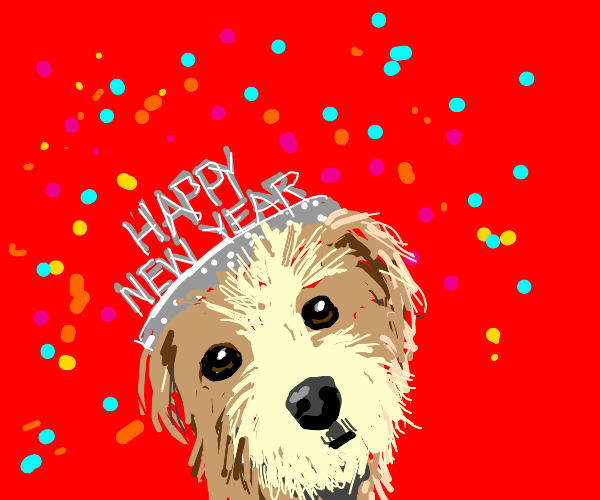

In [16]:
# Change the value of index and run this cell to display an image
index = 31089
img_0 = '../' + '/'.join(drawception.iloc[index,2].split('/')[3:6])
PIL.Image.open(img_0)

In [ ]:
# Write the image to a file at half resolution ### Specify filename ###
img_0 = '../' + '/'.join(drawception.iloc[index,2].split('/')[3:6])
copy_image = PIL.Image.open(img_0)
copy_image = copy_image.reduce(2)
copy_image.save(f'../slide_images/filename.png')

## Create a figure showing the number of reactions an image receives

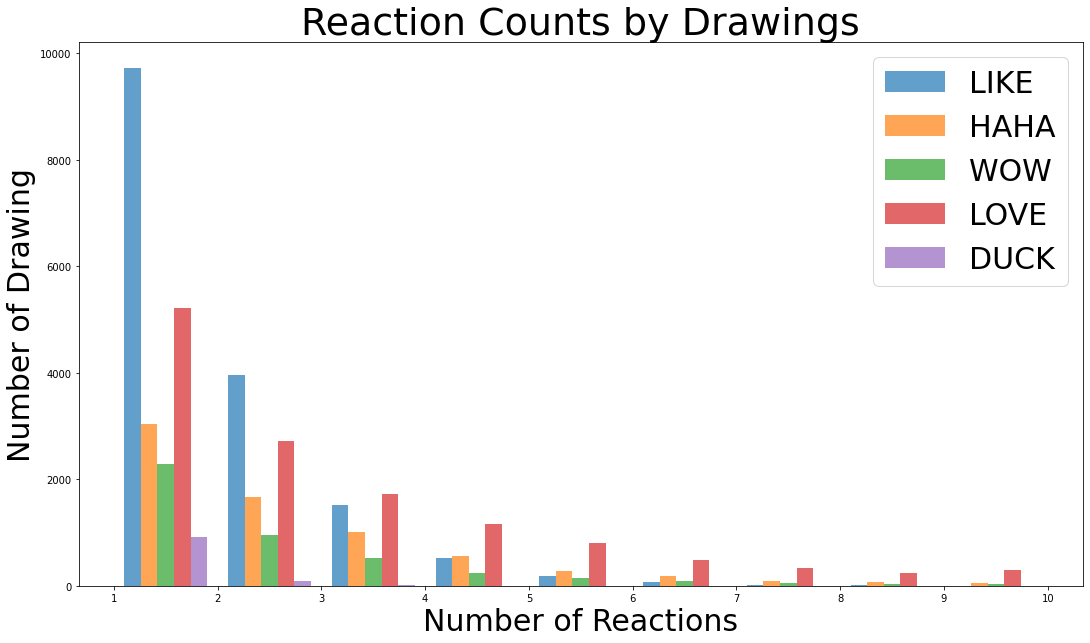

In [17]:
bins = np.linspace(1, 10, 10)

plt.figure(figsize=(18,10))

plt.hist([drawception['LIKE'],drawception['HAHA'],drawception['WOW'],drawception['LOVE'],drawception['DUCK']], 
         bins, 
         alpha=0.7, 
         label=['LIKE','HAHA','WOW','LOVE','DUCK'])

plt.title('Reaction Counts by Drawings', size=38)
plt.xlabel('Number of Reactions', size=30)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Number of Drawing', size=30)
plt.legend(loc='upper right', fontsize=30)
plt.savefig('../slide_images/reaction_hist.png')
plt.show()